__Étudiante__ : Madina TRAORÉ

#### Imports

In [1]:
import numpy as np
from ipynb.fs.defs.toolbox import softmax
from ipynb.fs.defs.mdp import maze_mdp # Markov Decision Process # RETIRER LES OCCURENCES DE "%notebook" DE mdp.py
                                       # POUR QUE CET IMPORT PUISSE SE FAIRE
from ipynb.fs.defs.maze_plotter import maze_plotter # used for visualization of the state value and policy evolution

# Actor-critic algorithm 

The actor-critic algorithm is a model-free reinforcement learning algorithm. It shares some similarity with the Policy Iteration algorithm, as it maintains a model of the value function (the critic) and a model of the current policy (the actor), and it improves the actor based on the critic and vice versa. But, of course, the transition and reward functions are not known and updates are performed locally.

There are many possible implementations of an actor-critic algorithm. Here, we focus on the most naive one, where the actor is a stochastic policy and actor updates modify the probability of taking actions.


## Stochastic policy

By taking inspiration of the Policy Iteration algorithm given in the [dynamic programming](dynamic_programming.ipynb) notebook, write a class to handle a stochastic policy, which gives a probability of taking each action in each state
with a table $P[x,u]$.

In [2]:
class Actor:
    
    # Here, the actor runs a stochastic policy
    
    def __init__(self, observation_space_size, action_space_size, alpha):
        self.P = np.ones((observation_space_size,action_space_size))/action_space_size
        self.alpha = alpha
        
    def P(self,x, u):
        return self.P[x,u]
    
    def update(self, x, u, new_value):
        self.P[x,u] = new_value

## Critic based on the action-value function

By taking inspiration of the Q-learning algorithm given in the [reinforcement learning](reinforcement_learning.ipynb) notebook, write a class to handle a critic represented as a Q-Table.

In [3]:
class Critic:
    
    # Here, the critic is represented as a Q-table
    
    def __init__(self, observation_space_size, action_space_size, alpha):
        self.Q = np.zeros((observation_space_size,action_space_size))
        self.alpha = alpha
    
    def Q(self, x, u):
        return self.Q[x,u]
    
    def update(self, x, u, new_value):
        self.Q[x,u] = new_value

## Actor-critic algorithm

Now, write the main ActorCritic class: it contains an agent, an actor, a critic, and two learning rate hyper-parameters $alpha_1$ and $alpha_2$.

Each time the agent takes a step in the environment, it computes a temporal difference error *delta* from the critic, then it updates the critic with

$Q[x,u] = Q[x,u] + alpha_1 * delta$

and it updates the probability of the actor of taking action *u* in state *x* with 

$P[x,u] = P[x,u] + alpha_2 * delta$

Then, it must renormalize the action probabilities for state *x*.

As for Q-learning and SARSA, the agent must perform some exploration steps, using for instance the softmax-policy or the *epsilon-greedy* policy, as seen in the [reinforcement learning](reinforcement_learning.ipynb) notebook.

In [4]:
def ActorCritic(mdp,tau,nEpisodes=100000,nTimesteps=50,alpha1=0.01,alpha2 = 0.01,render=True):
    # Initialize the state-action value function
    # alpha is the learning rate
    actor = Actor(mdp.observation_space.size,mdp.action_space.size, alpha1)
    critic = Critic(mdp.observation_space.size,mdp.action_space.size, alpha2)
    
    critic_Q_list = []
    policy_list = []
    
    # Run learning cycle
    mdp.timeout = nTimesteps #episode length
    
    if render:
        mdp.new_render()
        
    for i in range(nEpisodes) :
        #Draw the first state of episode i using a uniform distribution over all the states
        x = mdp.reset(uniform=True) 
        done = mdp.done()
        while not done:
            if render :
                # Show the agent in the maze
                mdp.render(critic.Q, critic.Q.argmax(axis=1))
            
            prob_list = actor.P[x]
            u = mdp.action_space.sample(prob_list=prob_list)

            # Perform a step of the MDP
            [y,r,done,info] = mdp.step(u)

            # Update the state-action value function with Q-Learning
            if x in mdp.terminal_states:
                critic.update(x,u,r)
            else:
                Qmax = critic.Q.max(axis=1)
                delta = r + mdp.gamma*Qmax[y] - critic.Q[x,u]
                critic.update(x,u,critic.Q[x,u] + alpha1 * delta)
                actor.update(x,u,actor.P[x,u] + alpha2 * delta) 
                
            # Update agent's position
            x = y
            
        # Save state-action value after each episode
        critic_Q_list.append(critic.Q.copy())
        policy_list.append(critic.Q.argmax(axis=1))

    if render :
        # Show the agent in the maze
        mdp.render(critic.Q, critic.Q.argmax(axis=1))
    return [critic_Q_list, policy_list]
    

<IPython.core.display.Javascript object>


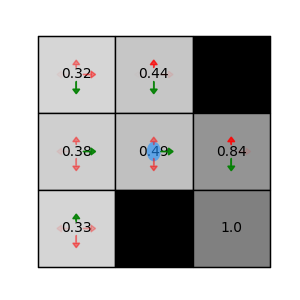

In [5]:
%matplotlib notebook

walls = [5,6]
height = 3
width = 3
terminal_states=[width*height-1]
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1])

[Q_list, policy_list] = ActorCritic(m,0.5,nEpisodes=100,nTimesteps=50,alpha1=0.1,alpha2 = 0.1,render=True)

### Experiments

Play with the values of the hyper-parameters $alpha_1$ and $alpha_2$. Any idea how these hyper-parameters should be set with respect to each other?

<IPython.core.display.Javascript object>


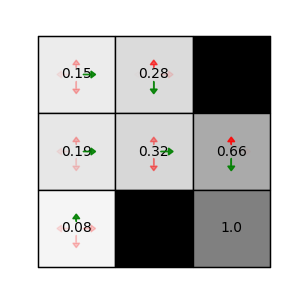

In [6]:
%matplotlib notebook

walls = [5,6]
height = 3
width = 3
terminal_states=[width*height-1]
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1])

[Q_list, policy_list] = ActorCritic(m,0.1,nEpisodes=100,nTimesteps=50,alpha1=0.05,alpha2 = 0.1,render=True)

<IPython.core.display.Javascript object>


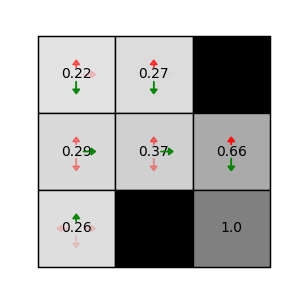

In [7]:
%matplotlib notebook

walls = [5,6]
height = 3
width = 3
terminal_states=[width*height-1]
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1])

[Q_list, policy_list] = ActorCritic(m,0.1,nEpisodes=100,nTimesteps=50,alpha1=0.2,alpha2 = 0.8,render=True)

<IPython.core.display.Javascript object>


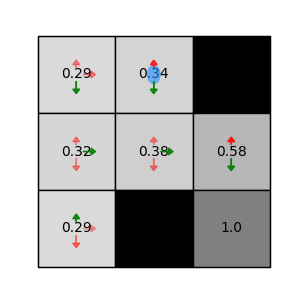

In [8]:
%matplotlib notebook

walls = [5,6]
height = 3
width = 3
terminal_states=[width*height-1]
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1])

[Q_list, policy_list] = ActorCritic(m,0.1,nEpisodes=100,nTimesteps=50,alpha1=0.4,alpha2 = 0.6,render=True)

## Critic based on the value function

The critic based on the action-value function can be replaced by a critic based on the value function without any change to the ActorCritic algorithm.

Try to do so below. Is it faster? Similar? Worse? In what case does it make a big difference?

In [13]:
class Value_based_Critic:
    
    # Here, the critic is represented as a Q-table
    
    def __init__(self, observation_space_size, action_space_size, alpha):
        self.V = np.zeros(observation_space_size)
        self.alpha = alpha
    
    def V(self, x):
        return self.V[x]
    
    def update(self, x, new_value):
        self.V[x] = new_value

In [14]:
def ActorCritic(mdp,tau,nEpisodes=100000,nTimesteps=50,alpha1=0.01,alpha2 = 0.01,render=True):
    # Initialize the state-action value function
    # alpha is the learning rate
    actor = Actor(mdp.observation_space.size,mdp.action_space.size, alpha1)
    critic = Value_based_Critic(mdp.observation_space.size,mdp.action_space.size, alpha2)
    
    critic_V_list = []
    policy_list = []
    
    pol = np.zeros((mdp.observation_space.size))
    
    # Run learning cycle
    mdp.timeout = nTimesteps #episode length
    
    if render:
        mdp.new_render()
        
    for i in range(nEpisodes) :
        #Draw the first state of episode i using a uniform distribution over all the states
        x = mdp.reset(uniform=True) 
        done = mdp.done()
        while not done:
            if render :
                # Show the agent in the maze
                mdp.render(critic.V, pol)
            
            prob_list = actor.P[x]
            u = mdp.action_space.sample(prob_list=prob_list)

            # Perform a step of the MDP
            [y,r,done,info] = mdp.step(u)

            # Update the state-action value function with Q-Learning
            if x in mdp.terminal_states:
                critic.update(x,r)
            else:
                delta = r + mdp.gamma*critic.V[y] - critic.V[x]
                critic.update(x,critic.V[x] + alpha1 * delta)
                actor.update(x,u,actor.P[x,u] + alpha2 * delta) 
                
            # Update agent's position
            x = y
            
        for x in mdp.observation_space.states:
            V_temp = []
            for u in mdp.action_space.actions:
                v = 0
                for y in mdp.observation_space.states:
                    v += mdp.r[x,u] + mdp.gamma*mdp.P[x,u,y]*critic.V[y]
                V_temp.append(v)
            # Set the policy for this state as the action u that maximizes the state value of x
            pol[x] = np.argmax(V_temp)
            
        # Save state-action value after each episode
        critic_V_list.append(critic.V.copy())
        policy_list.append(pol.copy())

    if render :
        # Show the agent in the maze
        mdp.render(critic.V, critic.V.argmax())
    return [critic_V_list, policy_list]
    

<IPython.core.display.Javascript object>


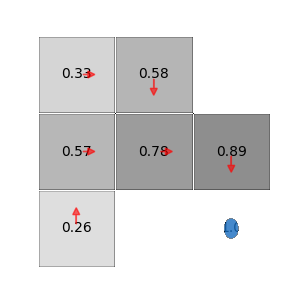

TypeError: object of type 'numpy.int64' has no len()

In [15]:
%matplotlib notebook

walls = [5,6]
height = 3
width = 3
terminal_states=[width*height-1]
m = maze_mdp(width, height, walls=walls, terminal_states=[height*width-1])

[V_list, policy_list] = ActorCritic(m,0.1,nEpisodes=100,nTimesteps=50,alpha1=0.1,alpha2 = 0.1,render=True)